In [1]:
import torch
import numpy as np
from torchvision import transforms
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from src.model import initialize_model

# Number of classes in the dataset
num_classes = 3

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = initialize_model(classes=num_classes)

state_dict = torch.load(
    "models/xception.pth",
    map_location=device,
)

model = model.to(device)
model.load_state_dict(state_dict)
model.eval();

In [2]:
def predict(image, model):
    transforms_image = transforms.Compose(
        [
            transforms.Resize((512, 512)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )

    image_np = np.asarray(image)
    image = transforms_image(image)
    image = image.unsqueeze(0)
    

    image = image.to(device)

    outputs = model(image)

    _, preds = torch.max(outputs, 1)

    preds = preds.to("cpu")

    preds_np = preds.squeeze(0).cpu().numpy().astype(np.uint8)

    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    preds_np_color = cv2.applyColorMap(preds_np * 50, cv2.COLORMAP_HSV)

    print(np.unique(preds_np, return_counts=True))

    # cv2.imwrite("results/segmentation.png", preds_np_color)
    # cv2.imwrite("results/image.png", image_np)
    fig, axs = plt.subplots(1, 2, figsize=(10, 20))
    axs[0].imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    axs[0].axis("off")
    axs[1].imshow(cv2.cvtColor(preds_np_color, cv2.COLOR_BGR2RGB))
    axs[1].axis("off")

(array([0, 1, 2], dtype=uint8), array([234242,   1592,  26310]))


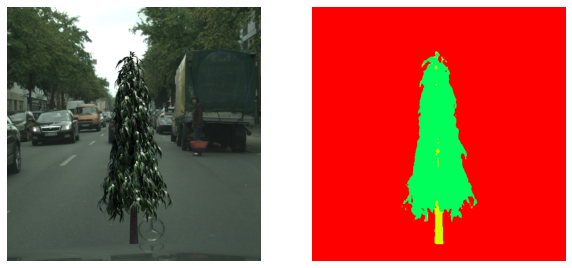

In [3]:
predict(Image.open("dataset_small/train/Images/100.png"), model);

(array([0, 1, 2], dtype=uint8), array([209719,   8193,  44232]))


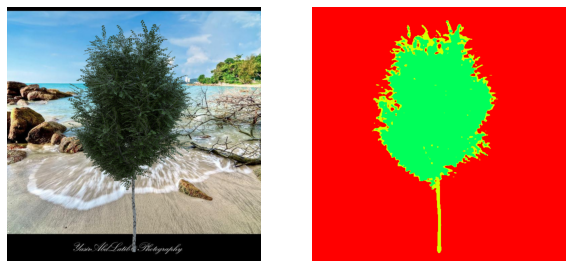

In [4]:
predict(Image.open("dataset_small/val/Images/10006.png"), model);

(array([0, 1, 2], dtype=uint8), array([196412,  17883,  47849]))


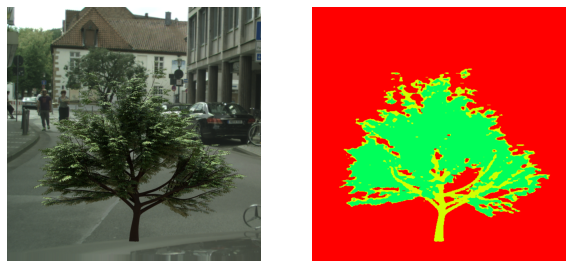

In [5]:
predict(Image.open("dataset_small/train/Images/1084.png"), model);